# **Problem :**
As part of a team of data scientists, you have been provided with a dataset and requested to develop a KNN model to predict whether someone has a potential risk of heart disease or not.

The dataset is in the form of a csv file called data-heart.csv. This dataset is available on the Moodle site under Week 11 Assessment. This dataset is complete, as it is, and therefore, there is no need to check for missing values or zero values.

**Your task is to create a KNN model and predict the potential risk of heart disease.**

### **Step-1:** Importing libraries

In [43]:
# --------------------
#  data manipulation
# --------------------
import pandas as pd
import numpy as np

# --------------------
#  data visualization
# --------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ---------------------------------------------------------------------------
#   Machine Learning: model selection, preprocessing, and model evaluation
# ---------------------------------------------------------------------------

# [1] split data into training and testing datasets
from sklearn.model_selection import train_test_split

# [2] featureScaling; to normalize the data
from sklearn.preprocessing import StandardScaler

# [3] define and fit the KNN model
from sklearn.neighbors import KNeighborsClassifier

# [4] evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

### **Step-2:** Loading and printing the dataset

In [44]:
# load the dataset
datapath = '/content/data-heart.csv'
df = pd.read_csv(datapath)

# check the length
print(len(df))

# print first 5 rows
print(df.head())

303
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


### **Step-3:** Identifying the features and target

In [45]:
# identifying features

# -- set all fields as a feature except the 'target'
x = df.drop(columns='target')
y = df['target']

### **Step-4:** Split the data

In [46]:
# split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 5)

### **Step-5:** Feature Scaling

In [47]:
# initialize the scaler
scaler = StandardScaler()

# scale the data between 0 and 1 for data consistency
# fit the scaler on the training data and transform both the training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# check the scaled data
print(x_train_scaled[:5])

[[ 0.07030624 -1.50674161 -0.97227182  2.75369729  1.61791953 -0.43159531
   2.76260089 -1.48892705  1.50674161  2.14467764 -0.65683133 -0.69043052
  -0.49747423]
 [-1.2729129  -1.50674161 -0.97227182  0.02536671  1.89152996  2.31698534
  -1.07963713 -0.64331359  1.50674161  1.78876337 -0.65683133 -0.69043052
   1.15168692]
 [-0.15356362  0.6636838   0.97227182 -0.08831373  0.03488775  2.31698534
  -1.07963713  1.00340736 -0.6636838  -0.88059368  0.98186126  2.31108179
  -0.49747423]
 [-0.93710811 -1.50674161 -0.97227182  0.36640803 -0.02374305 -0.43159531
  -1.07963713  0.06878196  1.50674161 -0.88059368 -0.65683133 -0.69043052
  -0.49747423]
 [-0.71323826 -1.50674161  0.97227182 -0.08831373  0.60165222 -0.43159531
   0.84148188 -0.50979567 -0.6636838  -0.70263655  0.98186126 -0.69043052
  -0.49747423]]


### **Step-6:** Find the optimal neighbour for KNN model

In [48]:
# start by checking the accuracy for values 1-20

# initializing the list to store accuracy
accuracy = []

# function to check the accuracy for values 1-20 and store them in a list
for k in range(1, 21):
    # define the KNN model with current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # train the model on the training data
    knn.fit(x_train_scaled, y_train)

    # predict on the test data
    y_pred = knn.predict(x_test_scaled)

    # calculate accuracy and append to the list
    accuracy.append(accuracy_score(y_test, y_pred))


# function to get the max value and its index for any list
def get_max_index(list):
  for i in range(len(list)):
    if list[i] == max(list):
      return i, list[i]

# compare and give out the max accuracy and its index
get_max_index(accuracy)

(6, 0.9016393442622951)

- *Since we got the index 6 as the index with maximum accuracy, we will take the number of neighbours as **'7'** to define the model.*

- *This also lines up with the good practise of choosing odd numbers for neighbours.*

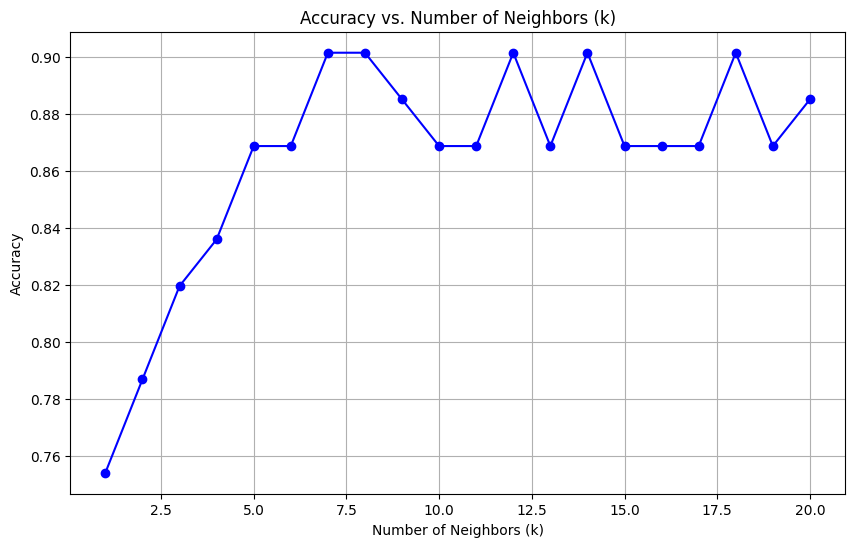

In [49]:
# plotting the accuracy for better visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracy, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

### **Step-7** Define and fit the KNN Model

In [50]:
# define the model
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric = 'euclidean')

# train the model
knn.fit(x_train_scaled, y_train)

# predict on the test set
y_pred = knn.predict(x_test_scaled)

# print the predictions
print("Predictions:", y_pred)
print("Actual labels:", y_test.values)

Predictions: [1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0]
Actual labels: [0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0]


### **Step-8** Evaluate the model

Evaluation helps to understand how well the model is performing on the test data using key metrics:

- **Confusion Matrix**: Summarizes correct/incorrect predictions.
- **Accuracy**: Percentage of correct predictions.
- **Precision**: Proportion of true positives out of all predicted positives.
- **Recall**: Proportion of true positives out of all actual positives.
- **F1** Score: Harmonic mean of precision and recall.

Confusion Matrix:
 [[27  3]
 [ 3 28]]


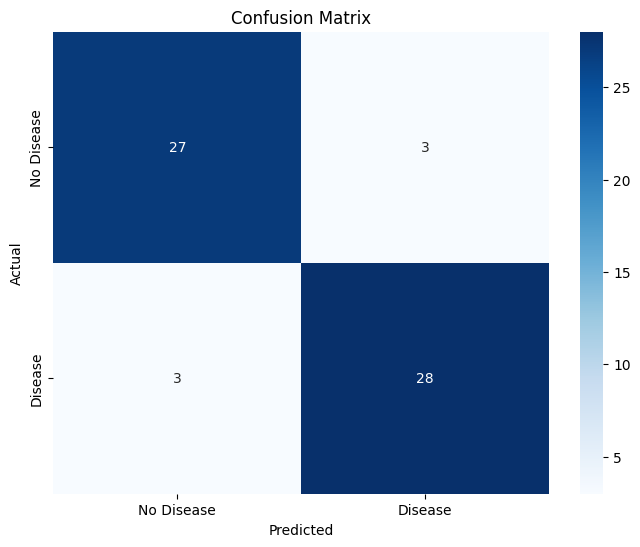

Accuracy: 0.9016393442622951

Classification Report:
               precision    recall  f1-score   support

  No Disease       0.90      0.90      0.90        30
     Disease       0.90      0.90      0.90        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [51]:
# generating the confusion matrix
cmatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cmatrix)

# plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# compute other metrics
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Print a detailed classification report
report = classification_report(y_test, y_pred, target_names=['No Disease', 'Disease'])
print("\nClassification Report:\n", report)

# Hyperparameter Optimization for KNN Classifier

## Key Points:

- **Objective**: Maximize model accuracy by finding the best combination of `n_neighbors` (1–20) and `random_state` (0–100).

### Steps:
1. **Data Splitting**: Use `train_test_split` to create training and testing sets for each parameter combination.
2. **Data Standardization**: Apply `StandardScaler` for consistent feature scaling.
3. **Model Training and Evaluation**:
   - Train KNN with current `n_neighbors` value on the scaled training set.
   - Predict on the test set and calculate accuracy.
4. **Store Results**: Record `n_neighbors`, `random_state`, and accuracy in a list.
5. **Best Parameters Identification**:
   - Convert results to a NumPy array.
   - Identify the combination with the highest accuracy using `np.argmax`.
6. **Output**: Print the best `n_neighbors`, `random_state`, and accuracy.

### Purpose:
This code systematically evaluates hyperparameter combinations to optimize KNN performance and identify the configuration yielding the highest accuracy.


In [52]:
# Initialize a list to store results
accuracy_results = []

# Loop through different n_neighbors and random_state values
for n_neighbors in range(1, 21):  # You can adjust the range for n_neighbors
    for random_state in range(0, 101):  # You can adjust the range for random_state
        # Split the dataset into training and testing sets
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)

        # Standardize the data
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)

        # Initialize the KNN model with current n_neighbors
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, p=2, metric='euclidean')

        # Fit the model
        knn.fit(x_train_scaled, y_train)

        # Predict on the test set
        y_pred = knn.predict(x_test_scaled)

        # Calculate accuracy and append to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results.append((n_neighbors, random_state, accuracy))

# Convert the results into a numpy array for easier manipulation
accuracy_results = np.array(accuracy_results)

# Find the best combination
best_result = accuracy_results[np.argmax(accuracy_results[:, 2])]
best_n_neighbors = best_result[0]
best_random_state = best_result[1]
best_accuracy = best_result[2]

print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best random_state: {best_random_state}")
print(f"Best accuracy: {best_accuracy}")

Best n_neighbors: 19.0
Best random_state: 72.0
Best accuracy: 0.9836065573770492


### Accuracy vs Random State Line Plot for KNN

- **Objective**: Visualize the relationship between `random_state` and `accuracy` for each value of `n_neighbors` (1–20).
- **Purpose**: This visualization helps identify patterns or trends in accuracy for different `n_neighbors` values across varying `random_state` configurations.

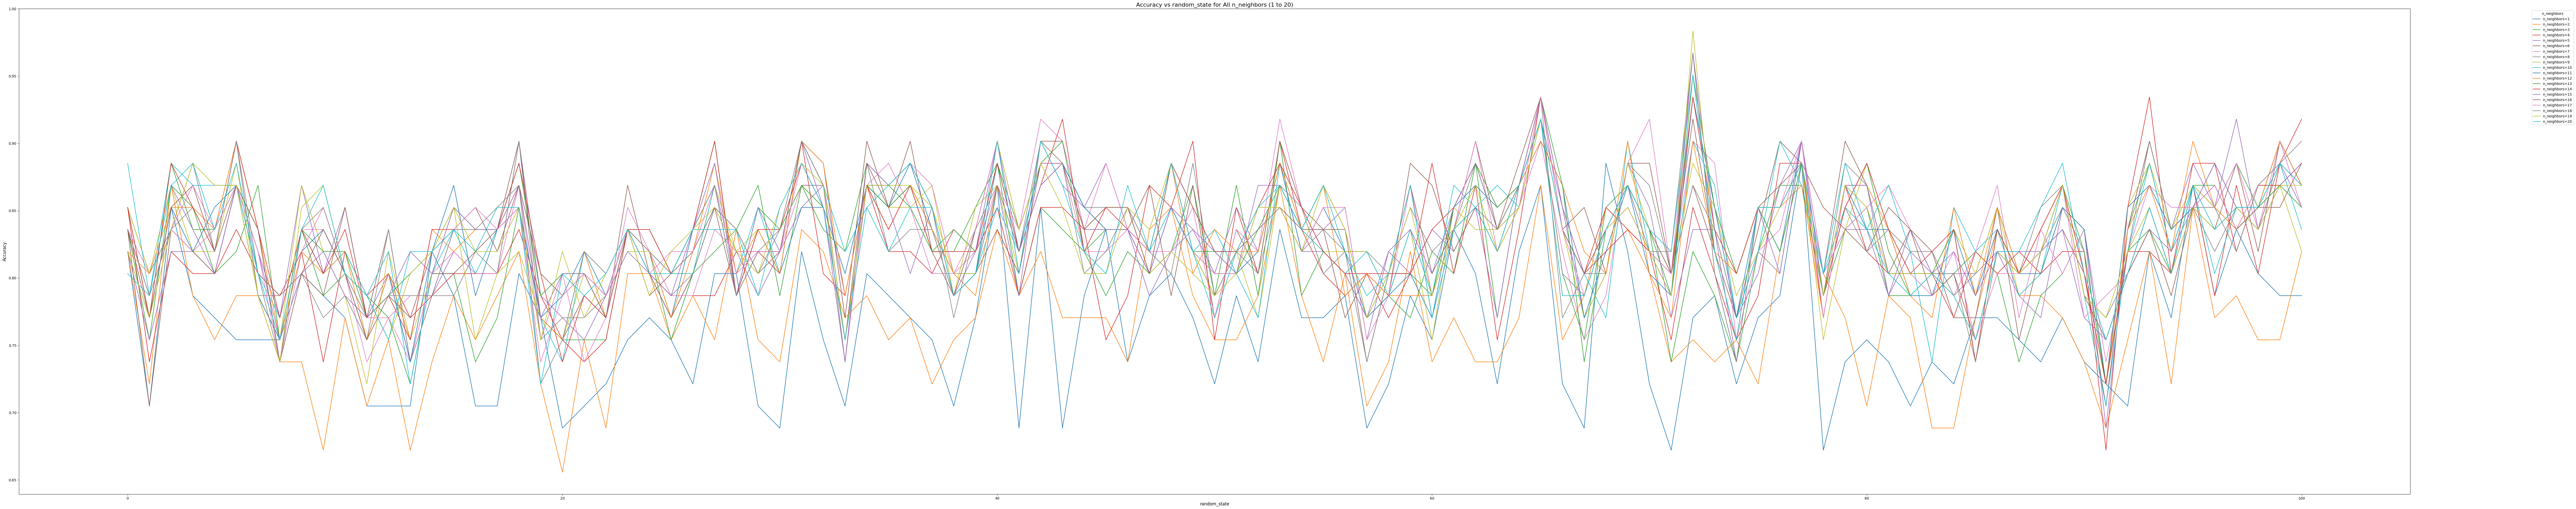

In [53]:
# Convert to DataFrame
accuracy_df = pd.DataFrame(accuracy_results, columns=['n_neighbors', 'random_state', 'accuracy'])

# Create the plot
plt.figure(figsize=(100, 20))

# Loop through each n_neighbors value to plot the lines
for n in range(1, 21):
    # Filter data for the current n_neighbors
    accuracy_df_n = accuracy_df[accuracy_df['n_neighbors'] == n]

    # Plot accuracy vs random_state for each n_neighbors
    sns.lineplot(x="random_state", y="accuracy", data=accuracy_df_n, label=f"n_neighbors={n}")

# Customize the plot
plt.title("Accuracy vs random_state for All n_neighbors (1 to 20)", fontsize=16)
plt.xlabel("random_state", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

# Add a legend to distinguish the lines
plt.legend(title="n_neighbors", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # To adjust the plot and avoid clipping
plt.show()

### Interactive 3D Scatter Plot: Accuracy vs `n_neighbors` and `random_state` (Accuracy >= 80)

#### Why Filtered 3D Scatterplot?
We filtered the data to exclude combinations where accuracy is below 80% in order to focus on the more relevant parameter configurations that yield better performance. The interactive 3D scatterplot enables dynamic exploration of these high-performing combinations while clearly highlighting the best configuration.

- **Objective**:
To create an interactive 3D scatter plot for parameter combinations where accuracy is 80% or higher, highlighting the best configuration for each `random_state`.

- **Purpose**:
The filtered 3D scatter plot provides an intuitive and engaging way to explore only the best-performing configurations, allowing users to identify the optimal `n_neighbors` and `random_state` for achieving high accuracy while maintaining interactivity.


In [54]:
# filter out combinations where accuracy is below 80
filtered_df = accuracy_df[accuracy_df['accuracy'] >= 0.8]

# find the best combination (highest accuracy) across all filtered combinations
best_combination = filtered_df.loc[filtered_df['accuracy'].idxmax()]

# create interactive 3D scatter plot using Plotly for filtered data
fig = px.scatter_3d(filtered_df,
                    x='random_state',
                    y='n_neighbors',
                    z='accuracy',
                    color='accuracy',
                    color_continuous_scale='viridis',  # Color scale for accuracy
                    title="3D Scatter Plot: Accuracy vs n_neighbors and random_state (Accuracy >= 80)",
                    labels={'random_state': 'Random State', 'n_neighbors': 'Number of Neighbors', 'accuracy': 'Accuracy'},
                    opacity=0.7)  # Adjust opacity to make the plot cleaner

# highlight the best combination (highest accuracy) with a distinct marker
fig.add_scatter3d(x=[best_combination['random_state']],
                  y=[best_combination['n_neighbors']],
                  z=[best_combination['accuracy']],
                  mode='markers',
                  marker=dict(size=8, color='red', symbol='x', line=dict(color='black', width=2)),
                  name='Best Combination')

# show the interactive plot
fig.update_layout(scene=dict(
                    xaxis_title='Random State',
                    yaxis_title='Number of Neighbors',
                    zaxis_title='Accuracy'),
                  showlegend=True)

fig.show()


### Final Optimized KNN Model

#### Why This Model?
This code represents the final step in optimizing the K-Nearest Neighbors (KNN) model. The model is configured with the best combination of parameters identified earlier: `n_neighbors = 19` and `random_state = 72`. We aim to evaluate the accuracy of this optimized configuration on the test set.

- **Objective**:
To train and evaluate the final optimized KNN model using the selected parameters and calculate its accuracy on the test dataset.

- **Purpose**:
This code executes the KNN algorithm on standardized data, calculates the accuracy of the model on unseen data (test set), and outputs the accuracy score to assess the performance of the final optimized model.


Accuracy: 0.9836065573770492 

Confusion Matrix:
 [[22  1]
 [ 0 38]] 



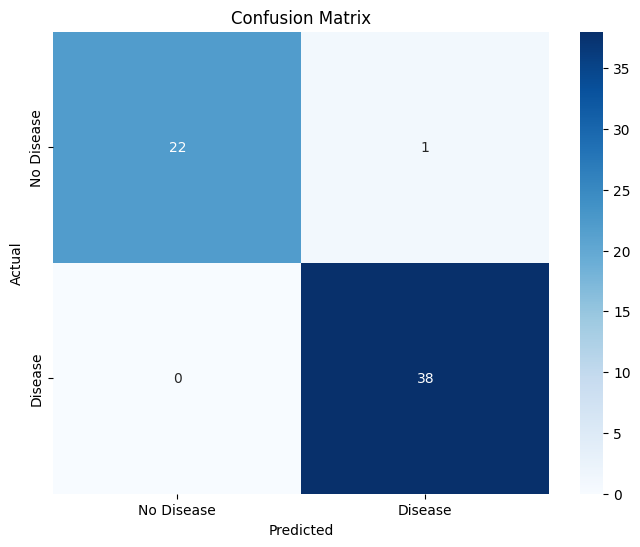

Accuracy: 0.9836065573770492

Classification Report:

               precision    recall  f1-score   support

  No Disease       1.00      0.96      0.98        23
     Disease       0.97      1.00      0.99        38

    accuracy                           0.98        61
   macro avg       0.99      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61


Metrics Conclusion :

    Accuracy  Precision  Recall  F1 Score    Confusion Matrix
0     0.984        1.0   0.974     0.987  [[22, 0], [1, 38]]


In [55]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=72)

# standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# initialize the KNN model with current n_neighbors
knn = KNeighborsClassifier(n_neighbors=19, p=2, metric='euclidean')

# fit the model
knn.fit(x_train_scaled, y_train)

# predict on the test set
y_pred = knn.predict(x_test_scaled)

# check the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy, "\n")

# generating the confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", c_matrix, "\n")

# plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# compute other metrics
print("Accuracy:", accuracy)

# print a detailed classification report
report = classification_report(y_test, y_pred, target_names=['No Disease', 'Disease'])
print("\nClassification Report:\n\n", report)

# compute metrics
metrics = {
    "Accuracy": accuracy_score(y_pred, y_test),
    "Precision": precision_score(y_pred, y_test),
    "Recall": recall_score(y_pred, y_test),
    "F1 Score": f1_score(y_pred, y_test),
    "Confusion Matrix": confusion_matrix(y_pred, y_test).tolist(),  # Convert to list for tabular display
}

# convert metrics to DataFrame
metrics_df = pd.DataFrame([metrics])
metrics_df = metrics_df.round(3)  # Optional: Round for readability
print("\nMetrics Conclusion :\n\n", metrics_df)